In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
bikerides = pd.read_csv('../Datasets/2014-02 - Citi Bike trip data.csv')
#remove unknown genders and replace gender values 1 and 2 to Male and Female respectively
bikerides = bikerides[bikerides['gender']>0]
bikerides['gender'] = bikerides['gender'].replace(1, 'Male').replace(2, 'Female')
#replace birth year with range 
#bikerides['birth year'] = bikerides['birth year'].str[:-1] + '0s'
bikerides = bikerides.rename(columns={'birth year':'years'})
bikerides= bikerides[bikerides['tripduration'] < 3000]
bikerides.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,years,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,Male
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,Female
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,Female
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,Male
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,Male


# Choose one variable and plot that variable four different ways.

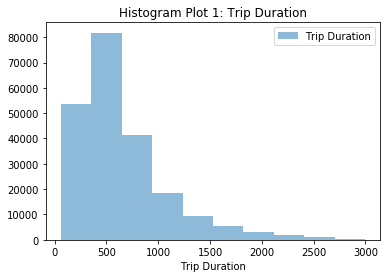

In [3]:
#setting variables for men and women bike ride durations
tripduration = bikerides['tripduration']

#plotting out histogram graph
#the type of plot, the label, the legend, the title
plt.hist(tripduration, alpha=.5, label='Trip Duration')
plt.xlabel('Trip Duration')
plt.legend(loc='upper right')
plt.title('Histogram Plot 1: Trip Duration')
plt.show()

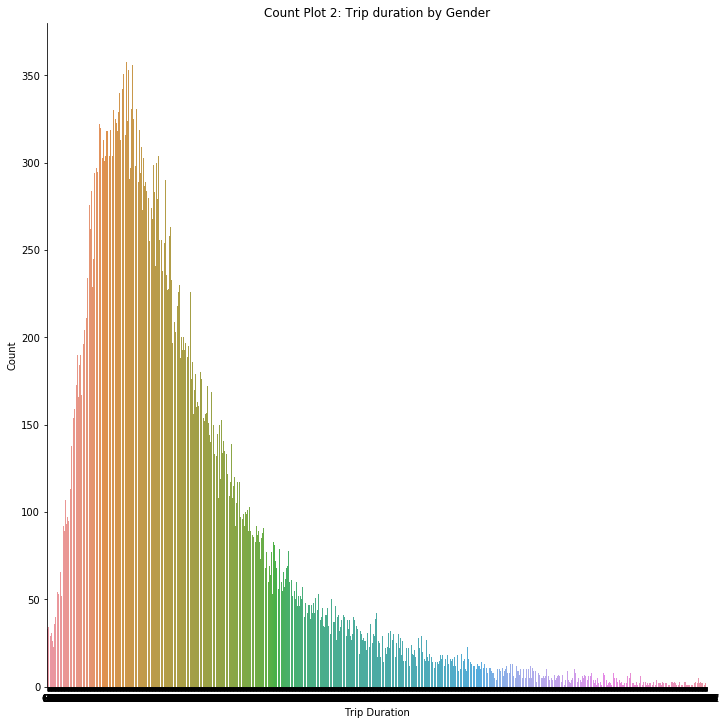

In [5]:
g=sns.factorplot(x='tripduration', data=bikerides, size=10, kind='count')
g.set_ylabels('Count')
g.set_xlabels('Trip Duration')
plt.title('Count Plot 2: Trip duration by Gender')
plt.show()

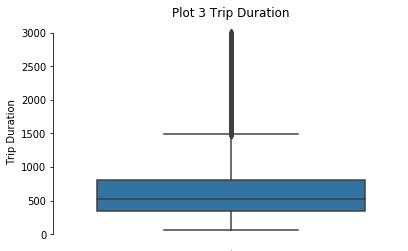

In [6]:
ax = sns.boxplot(y='tripduration', data=bikerides)
plt.title('Plot 3 Trip Duration')
#remove excess lines aound plot
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Trip Duration')
plt.show()

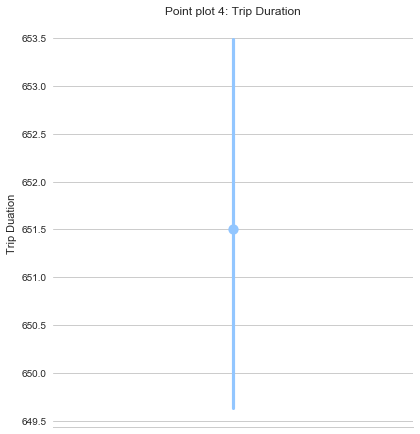

In [7]:
#setting aesthetics
sns.set(style='whitegrid')
g = sns.factorplot(y='tripduration', data=bikerides, size=6, kind="point", palette='pastel', dodge=True, join=False)
g.despine(left=True)
g.set_ylabels('Trip Duation')
g.set_xlabels('')
plt.title('Point plot 4: Trip Duration')
plt.show()

## Plots 1 and 2 shows the distribution of the data. They appear to be the same type of plots, but plot2, the count plot, appears to be seaborn's version of a histogram. For plot 1, I had to remove some extreme outliers to make the data useful and show a good distribution of trip durations. The box and whiskers has too many outliers for it to be useful in this scenario. The point plot is effective in showing the average as well as the margin of error.

# Choose two continuous variables, and plot them three different ways.

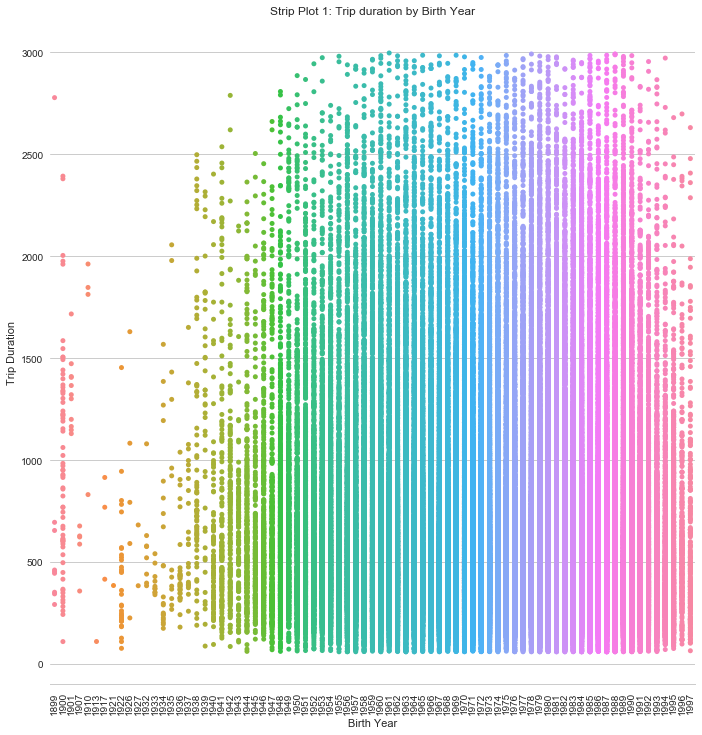

In [11]:
g=sns.factorplot(x='years', y='tripduration', data=bikerides,
                 size=10, kind='strip', ci=95)
g.despine(left=True)
g.set_xlabels('Birth Year')
g.set_ylabels('Trip Duration')
plt.title('Strip Plot 1: Trip duration by Birth Year')
g.set_xticklabels (rotation=90)
plt.show()

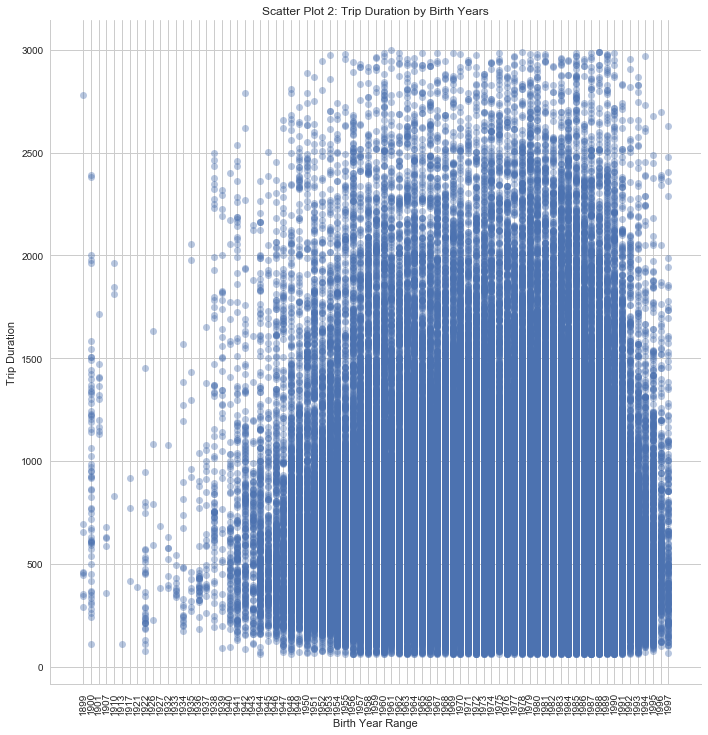

In [12]:
#variable 1, variable2, data, if true, plots regression line, semi transparent
g=sns.lmplot(y='tripduration', x='years', data=bikerides, size=10, fit_reg=False, scatter_kws={'alpha':0.4})
g.set_ylabels('Trip Duration')
g.set_xlabels('Birth Year Range')
g.set_xticklabels(rotation=90)
plt.title('Scatter Plot 2: Trip Duration by Birth Years')
plt.show()

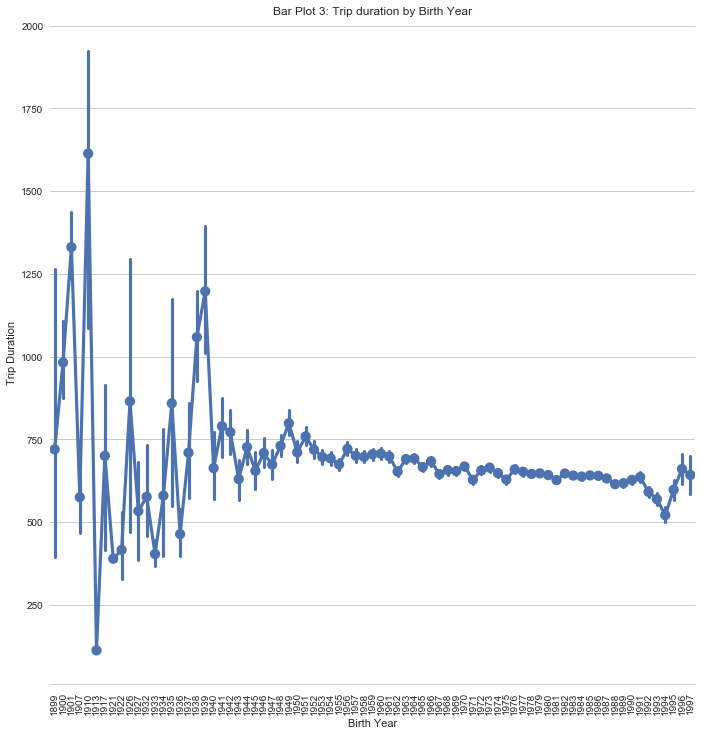

In [13]:
g=sns.factorplot(x='years', y='tripduration', data=bikerides, size=10, kind='point', ci=95)
g.despine(left=True)
g.set_xlabels('Birth Year')
g.set_ylabels('Trip Duration')
plt.title('Bar Plot 3: Trip duration by Birth Year')
g.set_xticklabels (rotation=90)
plt.show()

## The strip plot in seaborn appears to be a type of scatter plot, and in displaying this data, seems superior than plotting with a point in seaborn. It's hard to see all the values because there are just so many points to plot in the point graph, but in scatter plot, its much easier to noticewhere the values lie.

# Choose one continuous variable and one categorical variable, and plot them six different ways.

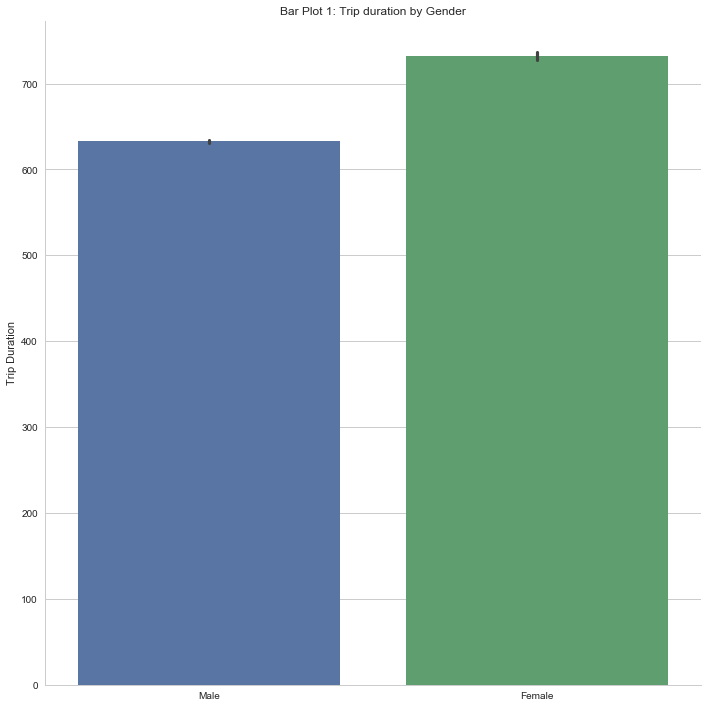

In [14]:
triptimemale = bikerides.loc[(bikerides['gender']=='Male'), 'tripduration']
triptimefemale = bikerides.loc[(bikerides['gender']=='Female'), 'tripduration']

g=sns.factorplot(x='gender', y='tripduration', data=bikerides, size=10, kind='bar')
g.set_xlabels('')
g.set_ylabels('Trip Duration')
plt.title('Bar Plot 1: Trip duration by Gender')
plt.show()

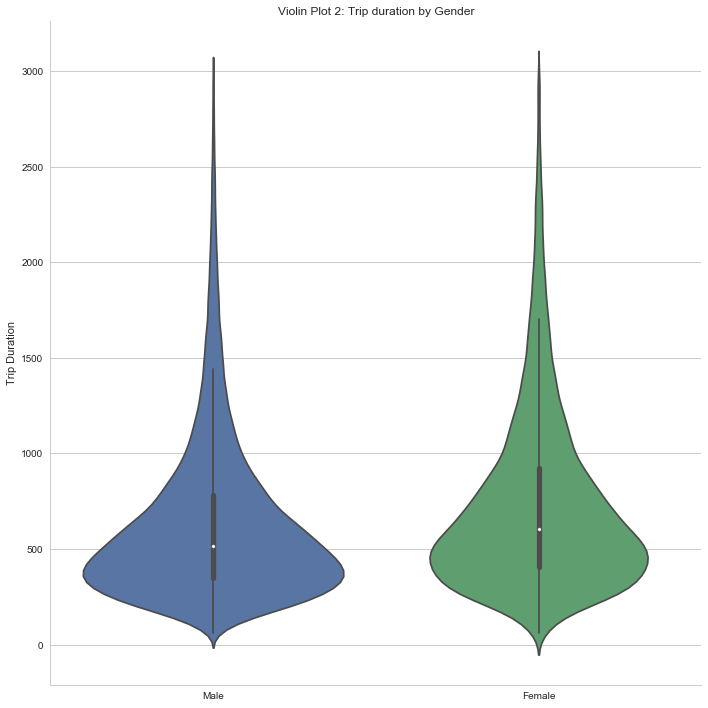

In [15]:
g=sns.factorplot(x='gender', y='tripduration', data=bikerides, size=10, kind='violin')
g.set_xlabels('')
g.set_ylabels('Trip Duration')
plt.title('Violin Plot 2: Trip duration by Gender')
plt.show()

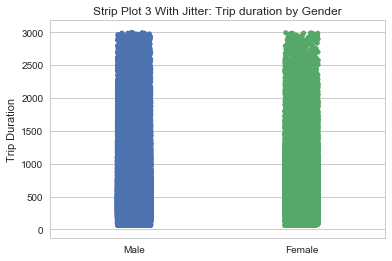

In [16]:
ax = sns.stripplot(x='gender', y='tripduration', data=bikerides, jitter=True)
ax.set(xlabel='', ylabel='Trip Duration')
plt.title('Strip Plot 3 With Jitter: Trip duration by Gender')
plt.show()

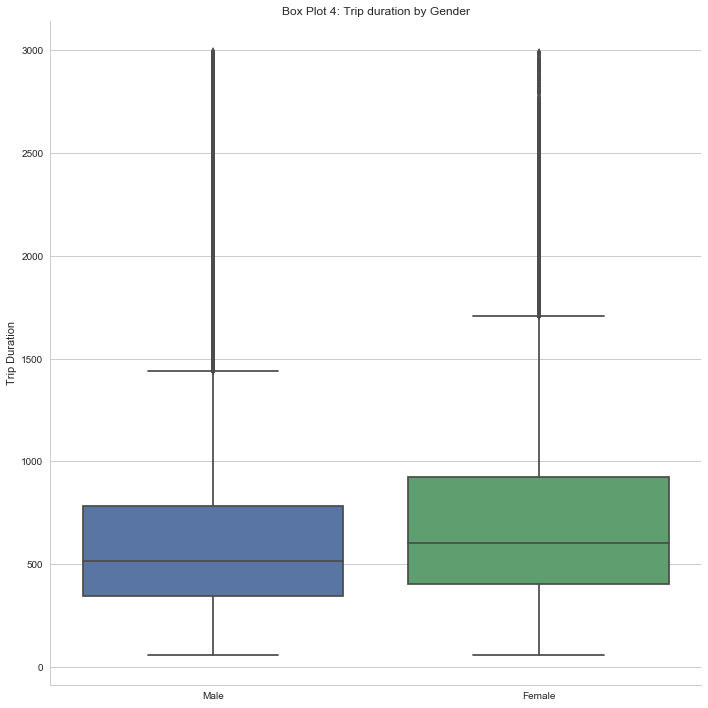

In [17]:
g=sns.factorplot(x='gender', y='tripduration', data=bikerides, size=10, kind='box')
g.set_xlabels('')
g.set_ylabels('Trip Duration')
plt.title('Box Plot 4: Trip duration by Gender')
plt.show()

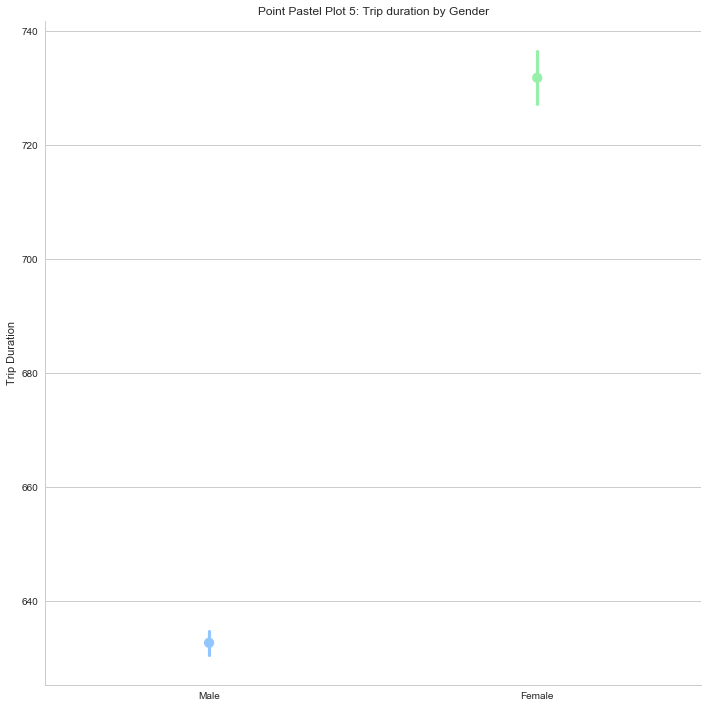

In [18]:
g=sns.factorplot(x='gender', y='tripduration', data=bikerides, size=10, kind='point', palette='pastel')
g.set_xlabels('')
g.set_ylabels('Trip Duration')
plt.title('Point Pastel Plot 5: Trip duration by Gender')
plt.show()

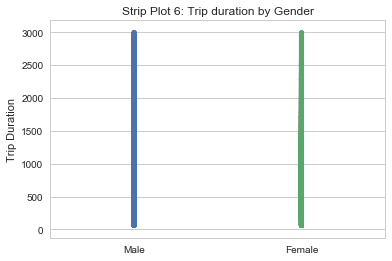

In [19]:
ax = sns.stripplot(x='gender', y='tripduration', data=bikerides)
ax.set(xlabel='', ylabel='Trip Duration')
plt.title('Strip Plot 6: Trip duration by Gender')
plt.show()

## Based on my observations, it appears that the stripplot with jitters is the most useful and visual appeasing graph available for plotting a continuous and categorical variables. The reasoning is that its far easier to see how "heavy" certain values may appear to be while not making it difficult to understand. For this kind of data, the point graph is also useful, but because it only shows the confidence interval and the average, it finds different data fr